In [2]:
import re
import requests
import random
import json
import math

from tabulate import tabulate
from random import randint
from time import sleep

from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:

gun_violence = pd.read_csv("data/data.csv")

In [4]:
uniq_states = sorted(list(gun_violence.state.unique()))
uniq_states

['Alabama',
 'Alaska',
 'Arizona',
 'Arkansas',
 'California',
 'Colorado',
 'Connecticut',
 'Delaware',
 'District of Columbia',
 'Florida',
 'Georgia',
 'Hawaii',
 'Idaho',
 'Illinois',
 'Indiana',
 'Iowa',
 'Kansas',
 'Kentucky',
 'Louisiana',
 'Maine',
 'Maryland',
 'Massachusetts',
 'Michigan',
 'Minnesota',
 'Mississippi',
 'Missouri',
 'Montana',
 'Nebraska',
 'Nevada',
 'New Hampshire',
 'New Jersey',
 'New Mexico',
 'New York',
 'North Carolina',
 'North Dakota',
 'Ohio',
 'Oklahoma',
 'Oregon',
 'Pennsylvania',
 'Rhode Island',
 'South Carolina',
 'South Dakota',
 'Tennessee',
 'Texas',
 'Utah',
 'Vermont',
 'Virginia',
 'Washington',
 'West Virginia',
 'Wisconsin',
 'Wyoming']

<b>Table for 2012 electoral results.</b> <br>
source: https://www.fec.gov/resources/cms-content/documents/federalelections2012.pdf
<br>
https://www.fec.gov/introduction-campaign-finance/election-and-voting-information/federal-elections-2016/

In [77]:
table_2012 = np.array([['Alabama', 'Republican'],
 ['Alaska', 'Republican'],
 ['Arizona', 'Republican'],
 ['Arkansas', 'Republican'],
 ['California', 'Democrat'],
 ['Colorado', 'Democrat'],
 ['Connecticut', 'Democrat'],
 ['Delaware', 'Democrat'],
 ['District of Columbia', 'Democrat'],
 ['Florida', 'Democrat'],
 ['Georgia', 'Republican'],
 ['Hawaii', 'Democrat'],
 ['Idaho', 'Republican'],
 ['Illinois', 'Democrat'],
 ['Indiana', 'Republican'],
 ['Iowa', 'Democrat'],
 ['Kansas', 'Republican'],
 ['Kentucky', 'Republican'],
 ['Louisiana', 'Republican'],
 ['Maine', 'Democrat'],
 ['Maryland', 'Democrat'],
 ['Massachusetts', 'Democrat'],
 ['Michigan', 'Democrat'],
 ['Minnesota', 'Democrat'],
 ['Mississippi', 'Republican'],
 ['Missouri', 'Republican'],
 ['Montana', 'Republican'],
 ['Nebraska', 'Republican'],
 ['Nevada', 'Democrat'],
 ['New Hampshire', 'Democrat'],
 ['New Jersey', 'Democrat'],
 ['New Mexico', 'Democrat'],
 ['New York', 'Democrat'],
 ['North Carolina', 'Republican'],
 ['North Dakota', 'Republican'],
 ['Ohio', 'Democrat'],
 ['Oklahoma', 'Republican'],
 ['Oregon', 'Democrat'],
 ['Pennsylvania', 'Democrat'],
 ['Rhode Island', 'Democrat'],
 ['South Carolina', 'Republican'],
 ['South Dakota', 'Republican'],
 ['Tennessee', 'Republican'],
 ['Texas', 'Republican'],
 ['Utah', 'Republican'],
 ['Vermont', 'Democrat'],
 ['Virginia', 'Democrat'],
 ['Washington', 'Democrat'],
 ['Virginia', 'Republican'],
 ['Wisconsin', 'Democrat'],
 ['Wyoming', 'Republican']])   


<b>Table for 2016 electoral results.</b> <br>

In [78]:
table_2016 = np.array([['Alabama', 'Republican'],
 ['Alaska', 'Republican'],
 ['Arizona', 'Republican'],
 ['Arkansas', 'Republican'],
 ['California', 'Democrat'],
 ['Colorado', 'Democrat'],
 ['Connecticut', 'Democrat'],
 ['Delaware', 'Democrat'],
 ['District of Columbia', 'Democrat'],
 ['Florida', 'Republican'],
 ['Georgia', 'Republican'],
 ['Hawaii', 'Democrat'],
 ['Idaho', 'Republican'],
 ['Illinois', 'Democrat'],
 ['Indiana', 'Republican'],
 ['Iowa', 'Republican'],
 ['Kansas', 'Republican'],
 ['Kentucky', 'Republican'],
 ['Louisiana', 'Republican'],
 ['Maine', 'Democrat'],
 ['Maryland', 'Democrat'],
 ['Massachusetts', 'Democrat'],
 ['Michigan', 'Republican'],
 ['Minnesota', 'Democrat'],
 ['Mississippi', 'Republican'],
 ['Missouri', 'Republican'],
 ['Montana', 'Republican'],
 ['Nebraska', 'Republican'],
 ['Nevada', 'Democrat'],
 ['New Hampshire', 'Democrat'],
 ['New Jersey', 'Democrat'],
 ['New Mexico', 'Democrat'],
 ['New York', 'Democrat'],
 ['North Carolina', 'Republican'],
 ['North Dakota', 'Republican'],
 ['Ohio', 'Republican'],
 ['Oklahoma', 'Republican'],
 ['Oregon', 'Democrat'],
 ['Pennsylvania', 'Republican'],
 ['Rhode Island', 'Democrat'],
 ['South Carolina', 'Republican'],
 ['South Dakota', 'Republican'],
 ['Tennessee', 'Republican'],
 ['Texas', 'Republican'],
 ['Utah', 'Republican'],
 ['Vermont', 'Democrat'],
 ['Virginia', 'Republican'],
 ['Washington', 'Democrat'],
 ['Virginia', 'Republican'],
 ['Wisconsin', 'Democrat'],
 ['Wyoming', 'Republican']])  


<b>Population data</b>

In [79]:
# https://www.census.gov/data/datasets/time-series/demo/popest/2010s-state-total.html#par_textimage_500989927
population = pd.read_excel("data/demography.xlsx", header=None, skiprows=[0,1,2])
column_names = population.iloc[0]

population.columns = population.iloc[0, :]
population.drop(population.index[0], inplace=True)

In [80]:
population.columns = [str(column) for column in population.columns]
print(population.index[population['nan'] == '.Alabama'].tolist()[0]-1)
print(population.index[population['nan'] == '.Wyoming'].tolist()[0])
population_2012 = (np.array(population[['2012.0']])[5:56])
population_2016 = (np.array(population[['2016.0']])[5:56])

5
56


<b> Now we have data on political affiliation and population size for every state: </b>
<br>
Population data from 2012 and 2016 is chosen because those are the election years where political affiliation is decided.
data_table_2012 and data_table_2016

In [81]:
data_table_2012 = np.c_[table_2012, population_2012]
data_table_2016 = np.c_[table_2016, population_2016]

In [82]:
data_table_2012[:5]

array([['Alabama', 'Republican', '4815588.0'],
       ['Alaska', 'Republican', '730443.0'],
       ['Arizona', 'Republican', '6554978.0'],
       ['Arkansas', 'Republican', '2952164.0'],
       ['California', 'Democrat', '37948800.0']], dtype='<U32')

In [83]:
# Full dataset range 2013-2018
gun_violence
# Gun violence dataset begindate-2016
gun_violence_2012 = gun_violence[gun_violence['date'] < '2016-01-01']
# Gun violence dataset 2016-enddate
gun_violence_2016 = gun_violence[(gun_violence['date'] >= '2016-01-01')]

In [84]:
deaths_2012 = []
deaths_2016 = []
for state in uniq_states:
    data_2012 = gun_violence_2012.loc[gun_violence_2012['state'] == state]
    temp = data_2012['n_killed'].sum()
    deaths_2012.append(temp) 
    
    data_2016 = gun_violence_2016.loc[gun_violence_2016['state'] == state]
    temp = data_2016['n_killed'].sum()
    deaths_2016.append(temp) 

#Number of deaths per state: n_killed summed
deaths_2012 = np.array(deaths_2012).reshape(len(uniq_states),1)
deaths_2016 = np.array(deaths_2016).reshape(len(uniq_states),1)

#Number of deaths per state per 100.000 residents
ratio_2012 = (deaths_2012/(population_2012/100000)).astype(int)
ratio_2016 = (deaths_2016/(population_2016/100000)).astype(int)

#Columns: {State/Political_Party/Population/Deaths/Ratio} 
final_2012 = np.c_[data_table_2012, deaths_2012,ratio_2012]
final_2016 = np.c_[data_table_2016, deaths_2016,ratio_2016]
print(tabulate([f for f in final_2012[:5]],
              headers=['State', 'Party', 'Population', 'Deaths', 'Ratio'],
              tablefmt='fancy_grid'))

╒════════════╤════════════╤══════════════════╤══════════╤═════════╕
│ State      │ Party      │       Population │   Deaths │   Ratio │
╞════════════╪════════════╪══════════════════╪══════════╪═════════╡
│ Alabama    │ Republican │      4.81559e+06 │      713 │      14 │
├────────────┼────────────┼──────────────────┼──────────┼─────────┤
│ Alaska     │ Republican │ 730443           │       99 │      13 │
├────────────┼────────────┼──────────────────┼──────────┼─────────┤
│ Arizona    │ Republican │      6.55498e+06 │      443 │       6 │
├────────────┼────────────┼──────────────────┼──────────┼─────────┤
│ Arkansas   │ Republican │      2.95216e+06 │      324 │      10 │
├────────────┼────────────┼──────────────────┼──────────┼─────────┤
│ California │ Democrat   │      3.79488e+07 │     2570 │       6 │
╘════════════╧════════════╧══════════════════╧══════════╧═════════╛


<b>Plotting the data</b>
<br>
Gun violence deaths summed up for every state.
Washington D.C. is technically not a state, but it is categorized in the dataset as such and thus it is included in the analysis.
<br>
For 2012:

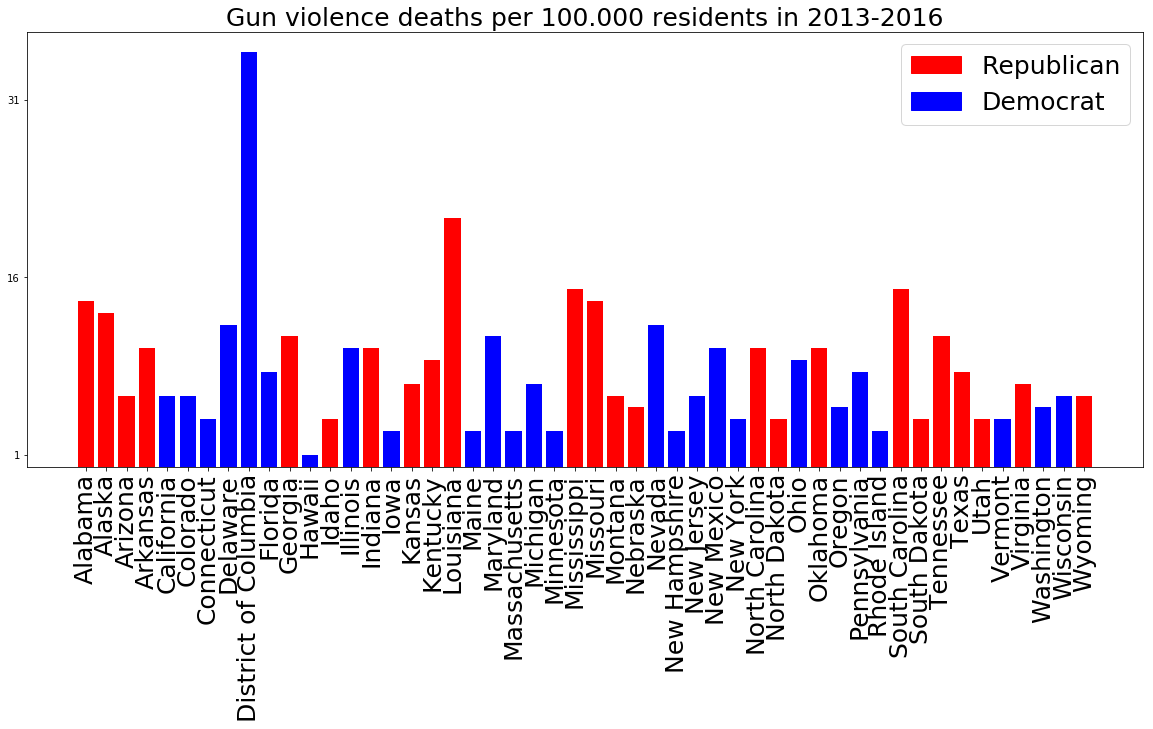

In [85]:
import matplotlib.patches as mpatches

x = final_2012[:,0]
y = final_2012[:,4]
y = [int(val) for val in y]

colors = ['red' if final_2012[i][1] == 'Republican' else 'blue' for i in range(len(x))]
plt.figure(1, figsize=(20,8))
plt.title('Gun violence deaths per 100.000 residents in 2013-2016', fontsize=25)
plt.xticks(rotation=90, fontsize=25)
plt.yticks(range(min(y), max(y), 15))
plt.bar(x,y, color=colors)
red = mpatches.Patch(color='red', label='Republican')
blue = mpatches.Patch(color='blue', label='Democrat')
plt.legend(handles=[red, blue], fontsize=25)
plt.show()


For 2016:

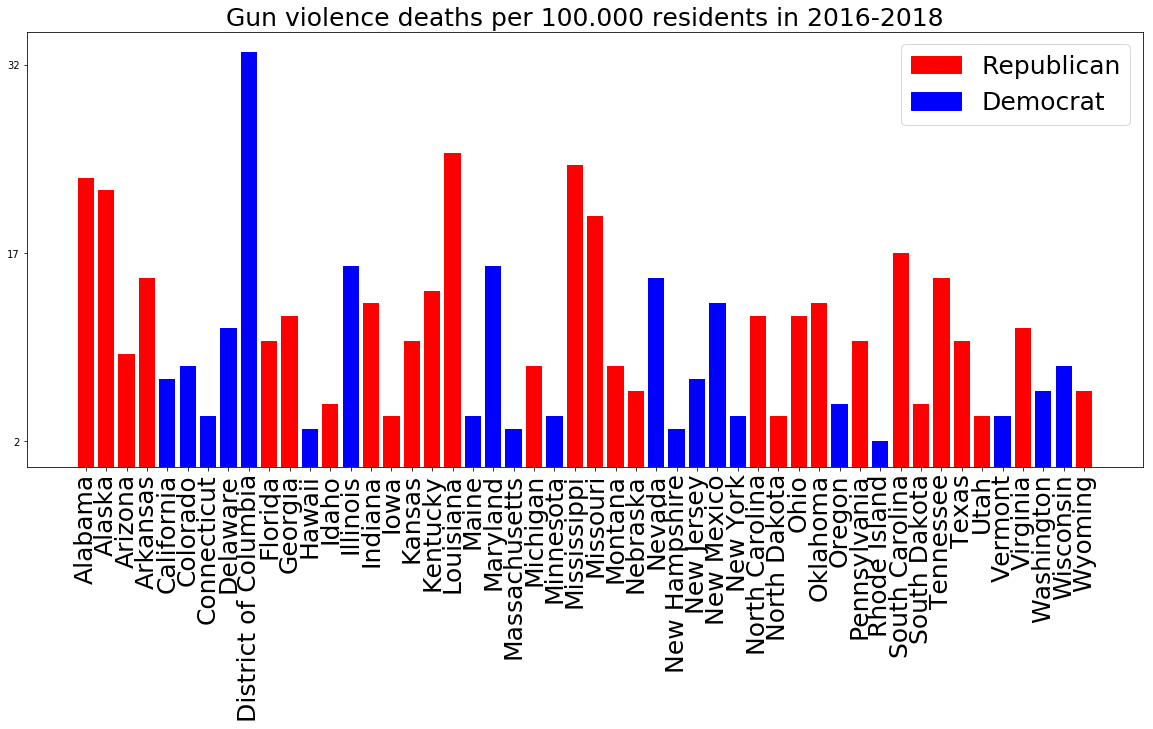

In [86]:
x = final_2016[:,0]
y = final_2016[:,4]
y = [int(val) for val in y]

colors = ['red' if final_2016[i][1] == 'Republican' else 'blue' for i in range(len(x))]
plt.figure(2, figsize=(20,8))
plt.title('Gun violence deaths per 100.000 residents in 2016-2018', fontsize=25)
plt.xticks(rotation=90, fontsize=25)
plt.yticks(range(min(y), max(y), 15))
plt.bar(x,y, color=colors)
red = mpatches.Patch(color='red', label='Republican')
blue = mpatches.Patch(color='blue', label='Democrat')
plt.legend(handles=[red, blue], fontsize=25)
plt.show()

Cumulative deaths republican and democratic states in 2012-2016

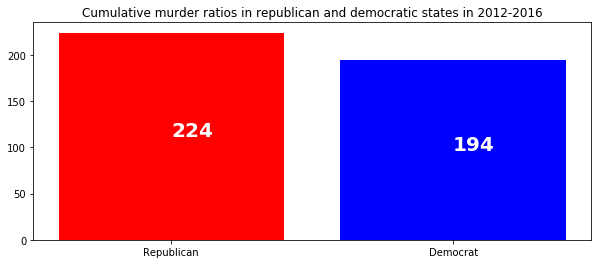

In [87]:
x = ['Republican', 'Democrat']
republican = sum([int(row[4]) for row in final_2012 if row[1] == 'Republican'])
democratic = sum([int(row[4]) for row in final_2012 if row[1] == 'Democrat'])
y = [republican, democratic]

plt.figure(3, figsize=(10,4))
plt.title('Cumulative murder ratios in republican and democratic states in 2012-2016')
plt.bar(x,y, color=['red', 'blue'])
for i, v in enumerate(y):
    plt.text(i, v*0.5, str(v), fontweight='bold', color='white', size='20')
plt.show()

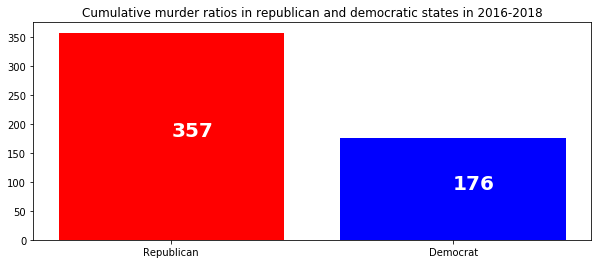

In [88]:
x = ['Republican', 'Democrat']
republican = sum([int(row[4]) for row in final_2016 if row[1] == 'Republican'])
democratic = sum([int(row[4]) for row in final_2016 if row[1] == 'Democrat'])
y = [republican, democratic]

plt.figure(3, figsize=(10,4))
plt.title('Cumulative murder ratios in republican and democratic states in 2016-2018')
plt.bar(x,y, color=['red', 'blue'])
for i, v in enumerate(y):
    plt.text(i, v*0.5, str(v), fontweight='bold', color='white', size='20')
plt.show()

<b> Interesting facts </b>

In [89]:
# Total deaths by gun violence in specified time period.
print("Total deaths in the USA 2013-2016")
print(sum([int(death) for death in final_2012[:,3]]))
print("Total deaths in the USA 2016-2018")
print(sum([int(death) for death in final_2016[:,3]]))

Total deaths in the USA 2013-2016
26358
Total deaths in the USA 2016-2018
34110


In [90]:
# Total deaths by gun violence for republican 
# states in specified time period.
rep12 = sum([int(row[3]) for row in final_2012 if row[1] == 'Republican'])
rep16 = sum([int(row[3]) for row in final_2016 if row[1] == 'Republican'])
# Total deaths by gun violence for democratic 
# states in specified time period.
dem12 = sum([int(row[3]) for row in final_2012 if row[1] == 'Democrat'])
dem16 = sum([int(row[3]) for row in final_2016 if row[1] == 'Democrat'])
b = '\033[1m'
print(tabulate([['Republican states', rep12, rep16, rep12+rep16],
                ['Democratic states', dem12, dem16, dem12+dem16],
               ['Total', rep12+dem12, rep16+dem16, rep12+dem12+
               rep16+dem16]],
              headers=[('Party'), '2013-2016', '2016-2018', 'Total'],
              tablefmt='fancy_grid'))

╒═══════════════════╤═════════════╤═════════════╤═════════╕
│ Party             │   2013-2016 │   2016-2018 │   Total │
╞═══════════════════╪═════════════╪═════════════╪═════════╡
│ Republican states │       12120 │       22991 │   35111 │
├───────────────────┼─────────────┼─────────────┼─────────┤
│ Democratic states │       14238 │       11119 │   25357 │
├───────────────────┼─────────────┼─────────────┼─────────┤
│ Total             │       26358 │       34110 │   60468 │
╘═══════════════════╧═════════════╧═════════════╧═════════╛
